In [1]:
# Let's start with a simple example of the scikit lib use

import sys
sys.path.append('./privatizers')
sys.path.append('./dataProviders')
sys.path.append('./adapters')

from sklearn import tree
from dataProviders import breastCancerDataProvider as dataProvider
from adapters import breastCancerAdapter as adapter

dp = dataProvider.BreastCancerDP()

X = dp.getAllData()
Y = dp.getAllTargets()


In [2]:
## Dataset
data_set = {
    'samples': X,
    'labels': Y
}

In [3]:
## Decision tree without privatization
clf = tree.DecisionTreeClassifier()
# clf = clf.fit(data_set['samples'], data_set['labels'])

tree.plot_tree(clf.fit(data_set['samples'], data_set['labels']))

[Text(302.25, 346.49999999999994, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(186.0, 300.29999999999995, 'X[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(85.25, 254.09999999999997, 'X[29] <= 0.055\ngini = 0.03\nsamples = 333\nvalue = [5, 328]'),
 Text(69.75, 207.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(100.75, 207.89999999999998, 'X[13] <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [4, 328]'),
 Text(62.0, 161.7, 'X[14] <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [2, 317]'),
 Text(31.0, 115.5, 'X[1] <= 19.9\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(15.5, 69.30000000000001, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(46.5, 69.30000000000001, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(93.0, 115.5, 'X[21] <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [1, 311]'),
 Text(77.5, 69.30000000000001, 'gini = 0.0\nsamples = 292\nvalue = [0, 292]'),
 Text(108.5, 69.30000000000001, 'X[21] <= 3

In [4]:
## Privatization: Coin privatizer

# from privatizers import coinPrivatizer

# private_format = []

# for index, value in enumerate(data_set['samples']):
#     single_list = []
#     for num in value:
#         single_list.append(False if num == 0 else True)
#     single_list.append(False if data_set['labels'][index]==0 else True)
#     private_format.append(single_list)

# coin_privatizer = coinPrivatizer.CoinPrivatizer()
# private_format = coin_privatizer.privatize(private_format)

# private_data_set = {
#     'samples': [],
#     'labels': []
# }

# for value in private_format:
#     private_data_set['labels'].append(1 if value.pop() else 0)
#     single_list = []
#     for v in value:
#         single_list.append(1 if v else 0)
#     private_data_set['samples'].append(single_list)

# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(private_data_set['samples'], private_data_set['labels'])

# tree.plot_tree(clf.fit(private_data_set['samples'], private_data_set['labels']))

[Text(233.32876794258374, 210.645, 'X[22] <= 112.799\ngini = 0.496\nsamples = 569\nvalue = [259, 310]'),
 Text(180.3154306220096, 197.055, 'X[21] <= 32.577\ngini = 0.447\nsamples = 380\nvalue = [128, 252]'),
 Text(149.17822966507177, 183.465, 'X[8] <= 1.729\ngini = 0.426\nsamples = 342\nvalue = [105, 237]'),
 Text(120.54401913875598, 169.875, 'X[8] <= 0.699\ngini = 0.403\nsamples = 315\nvalue = [88, 227]'),
 Text(85.70239234449761, 156.285, 'X[23] <= 624.249\ngini = 0.436\nsamples = 246\nvalue = [79, 167]'),
 Text(44.85358851674641, 142.695, 'X[0] <= 10.141\ngini = 0.475\nsamples = 167\nvalue = [65, 102]'),
 Text(20.82488038277512, 129.10500000000002, 'X[29] <= 1.204\ngini = 0.303\nsamples = 43\nvalue = [8, 35]'),
 Text(12.81531100478469, 115.515, 'X[5] <= 1.178\ngini = 0.193\nsamples = 37\nvalue = [4, 33]'),
 Text(6.407655502392345, 101.925, 'X[28] <= 3.45\ngini = 0.061\nsamples = 32\nvalue = [1, 31]'),
 Text(3.2038277511961724, 88.33500000000001, 'gini = 0.0\nsamples = 31\nvalue = [0

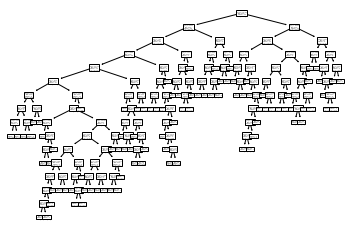

In [6]:
## Privatization: Laplace privatizer
from privatizers import laplacePrivatizer

privatizer = laplacePrivatizer.LaplacePrivatizer()
privateData = privatizer.privatize(adapter.fromRaw(data_set['samples']))

privateTargetsFloat = privatizer.privatize(adapter.fromRaw(data_set['labels']))
privateTargets = adapter.toBinaryInt(privateTargetsFloat)
# privateTargerts = data_set['labels']

clf = tree.DecisionTreeClassifier()
# clf = clf.fit(privateData, privateTargets)

tree.plot_tree(clf.fit(privateData, privateTargets))